In [15]:
import pickle
headline_dat = pickle.load(open("datePredictions.pkl", "rb"))
date_tot = {}
date_neg = {}
date_pos = {}

In [22]:
headline_dat[0]

['2018-11-09',
 [('Who Has the Best Shots in Men’s Tennis?',
   array([[-0.35512877, -1.20759   ]], dtype=float32),
   'Negative')]]

In [18]:
for x in headline_dat:
    date = x[0]
    label = x[1][0][2]
    if date not in date_tot:
        date_tot[date] = 0
        date_pos[date] = 0
        date_neg[date] = 0
    date_tot[date] += 1
    if label == "Negative":
        date_neg[date] += 1
    else:
        date_pos[date] += 1

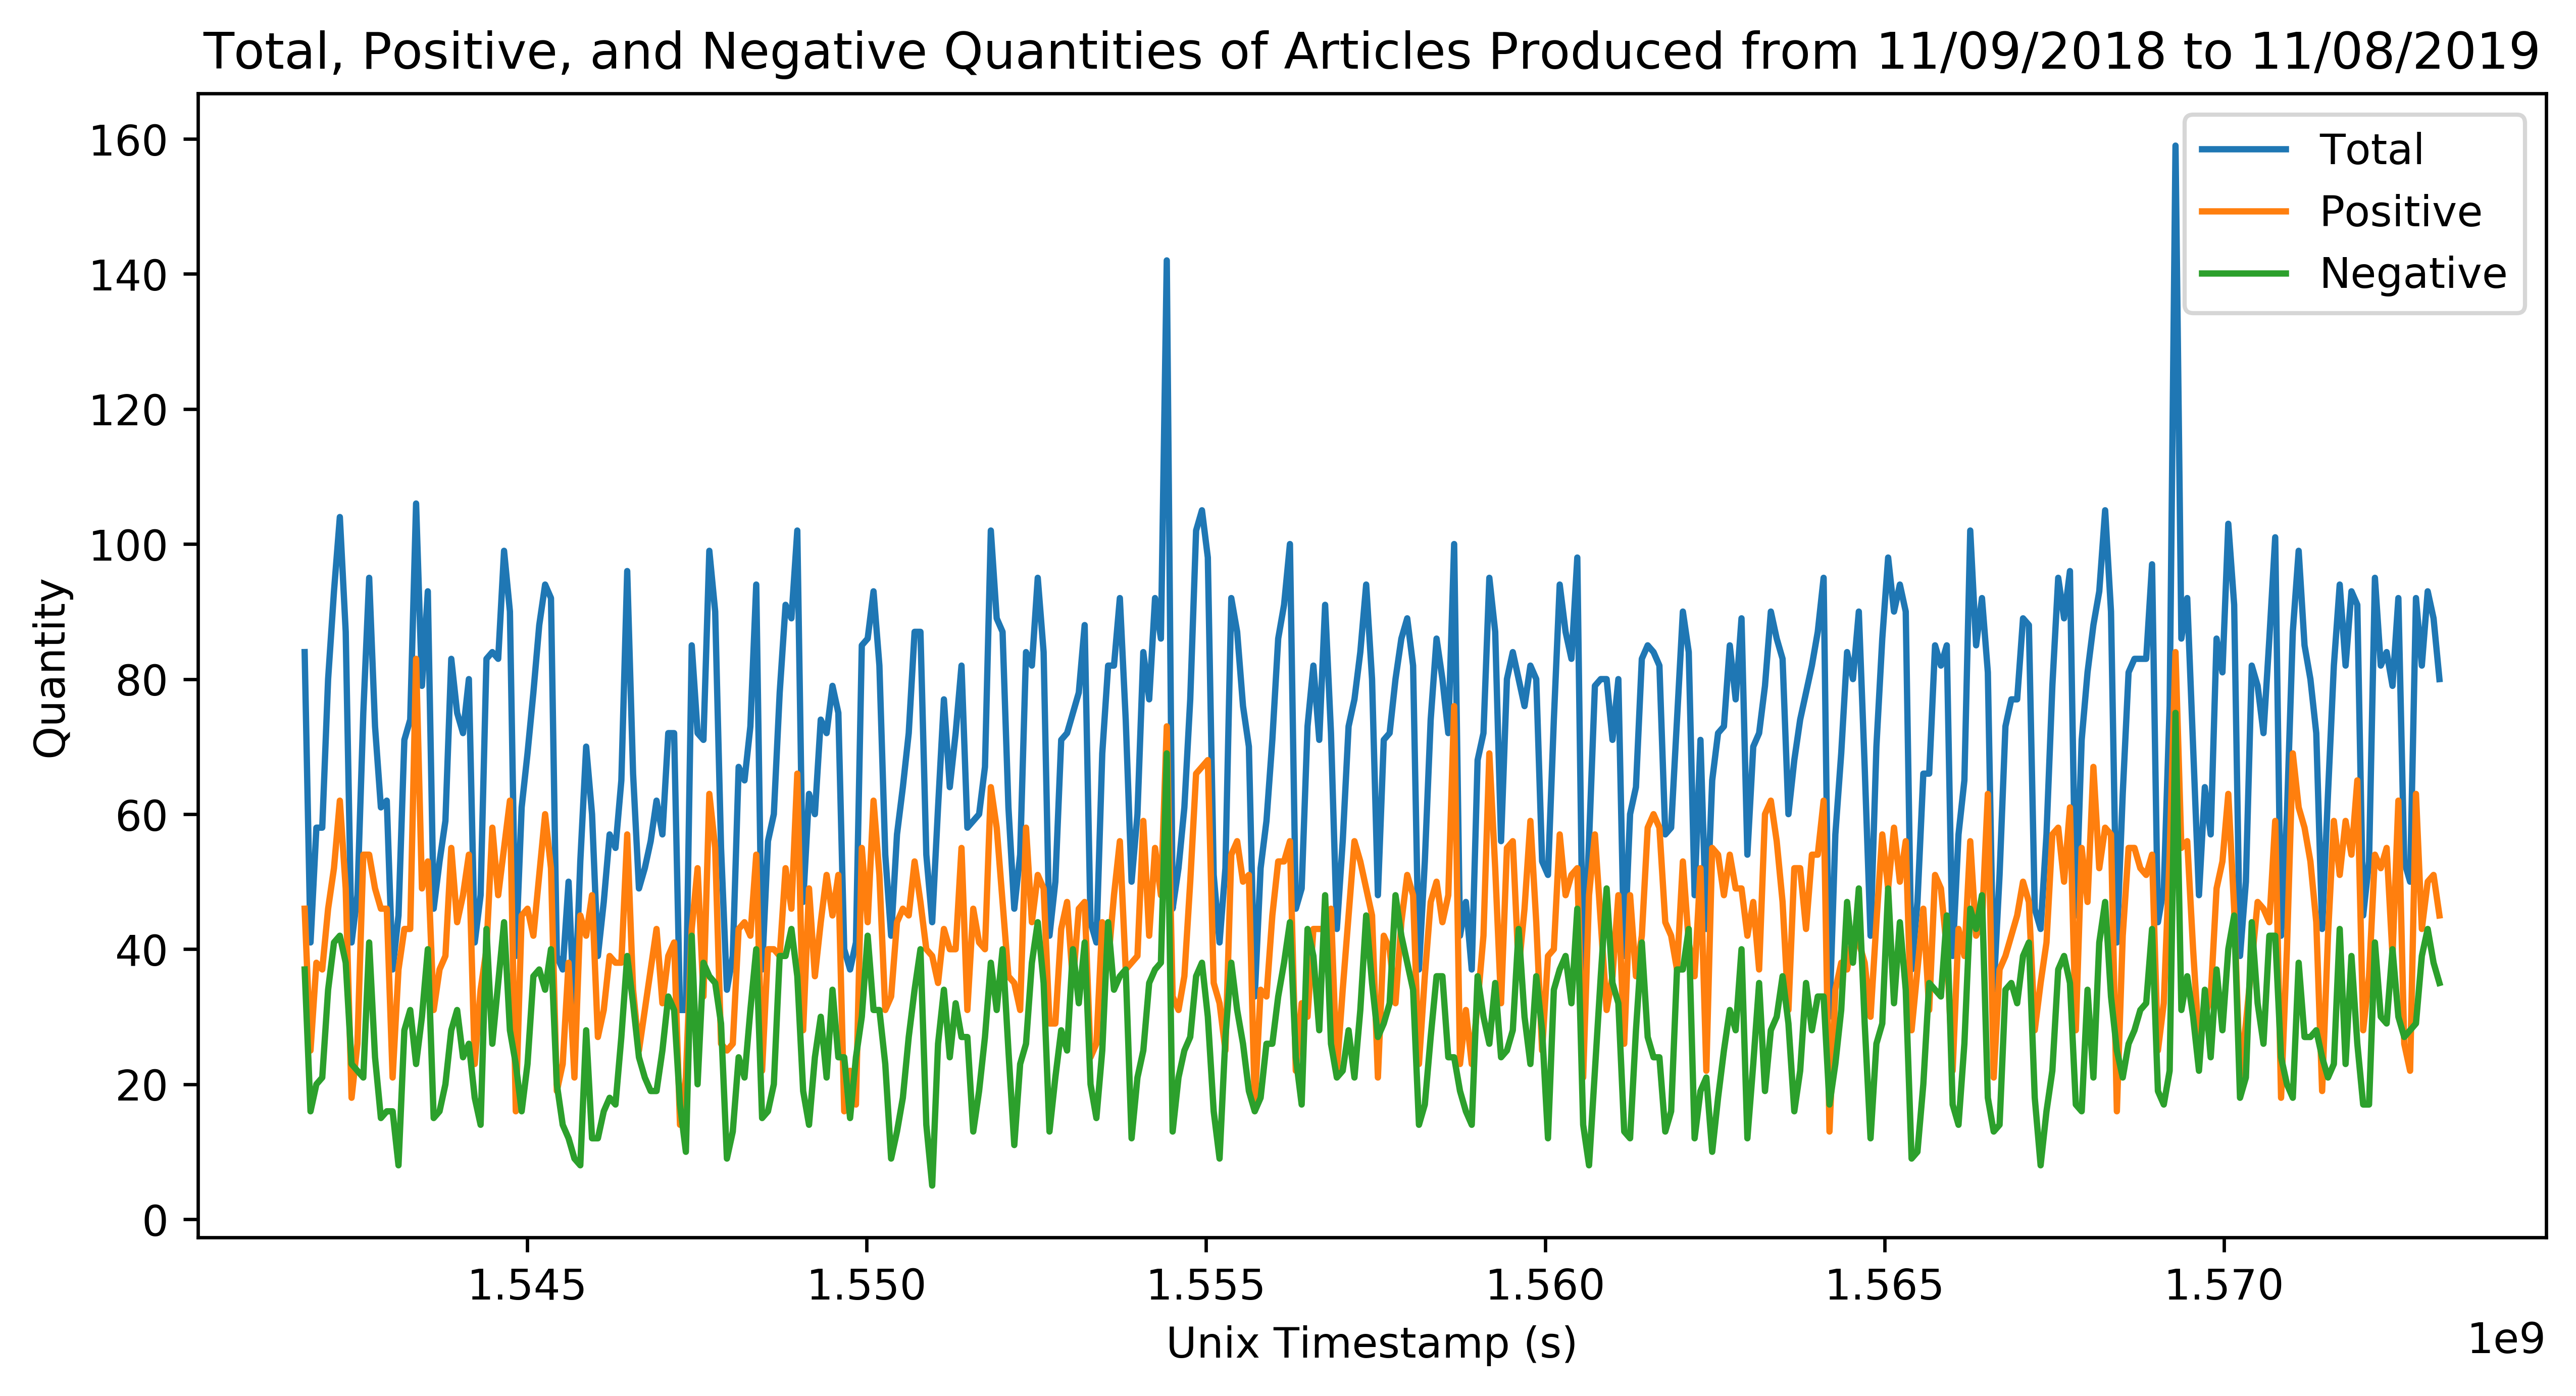

In [68]:
import matplotlib.pyplot as plt
import datetime
plt.rcParams['figure.figsize'] = [10, 5]
plt.rcParams['figure.dpi'] = 600
x = [int((datetime.datetime.strptime(x, "%Y-%m-%d") - datetime.datetime(1970, 1, 1)).total_seconds()) for x in date_tot.keys()]
plt.plot(x, [y for y in date_tot.values()], label="Total")
plt.plot(x, [y for y in date_pos.values()], label="Positive")
plt.plot(x, [y for y in date_neg.values()], label="Negative")
plt.xlabel("Unix Timestamp (s)")
plt.ylabel("Quantity")
plt.title("Total, Positive, and Negative Quantities of Articles Produced from 11/09/2018 to 11/08/2019")
plt.legend()


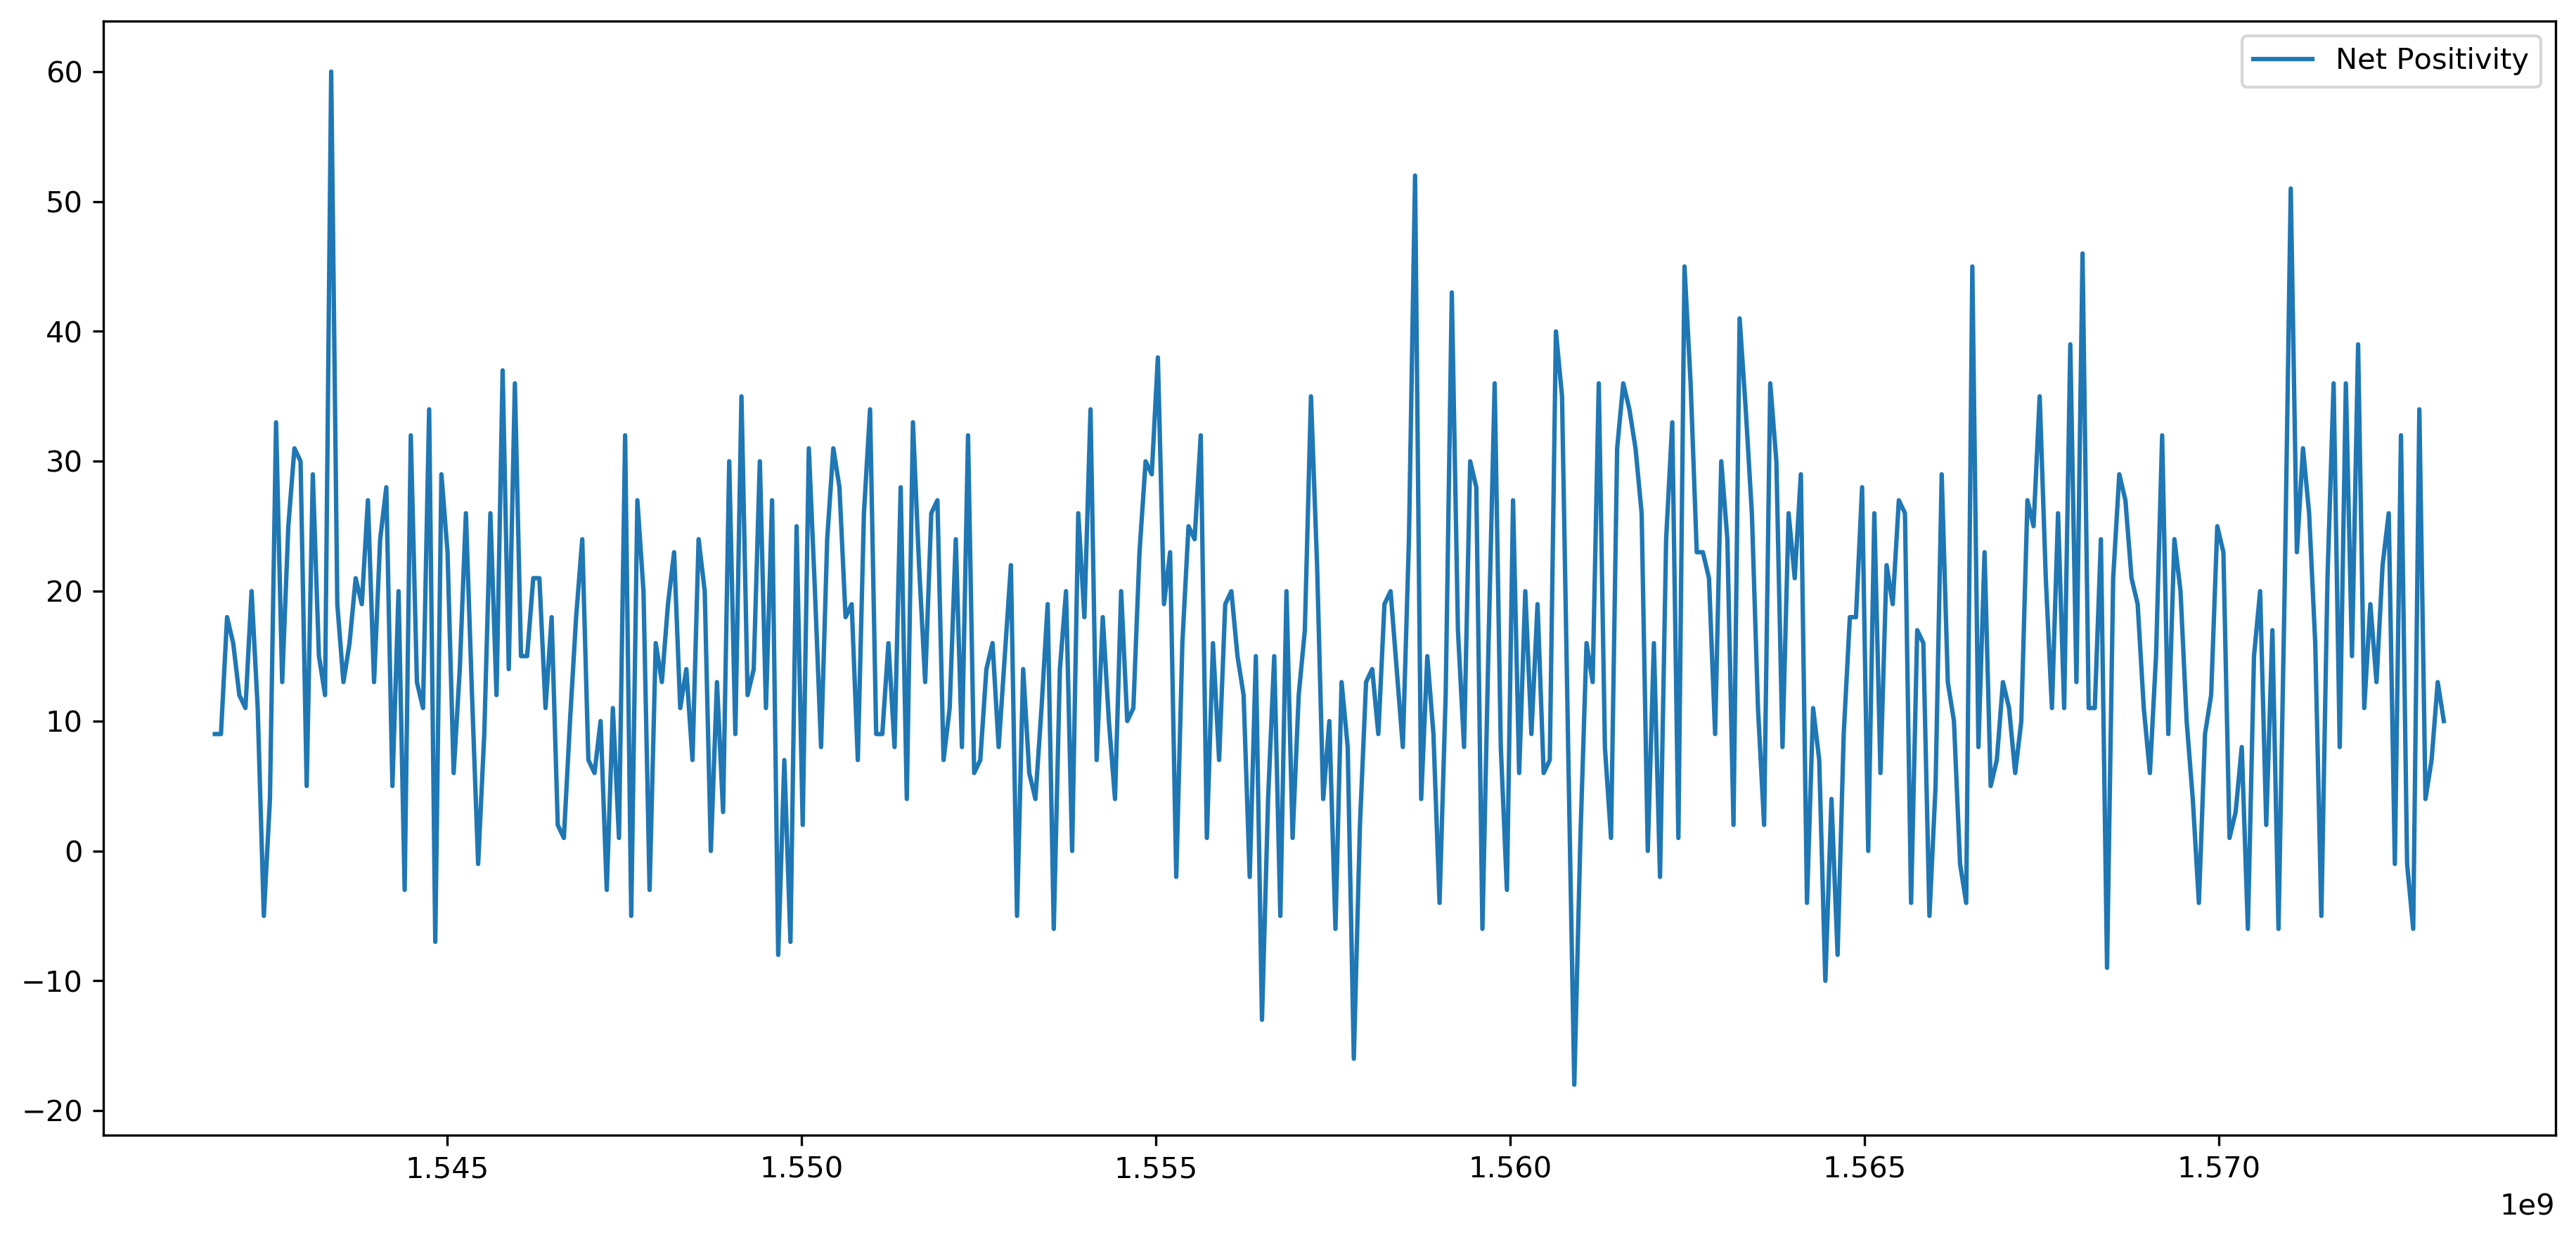

In [63]:
plt.plot(x, [y[0] - y[1] for y in zip(date_pos.values(), date_neg.values())], label="Net Positivity")
plt.legend()

Text(0.5, 1.0, 'Net Positivity Ratio ($\\frac{p - n}{p + n}$) of Articles Produced from 11/09/2018 to 11/08/2019')

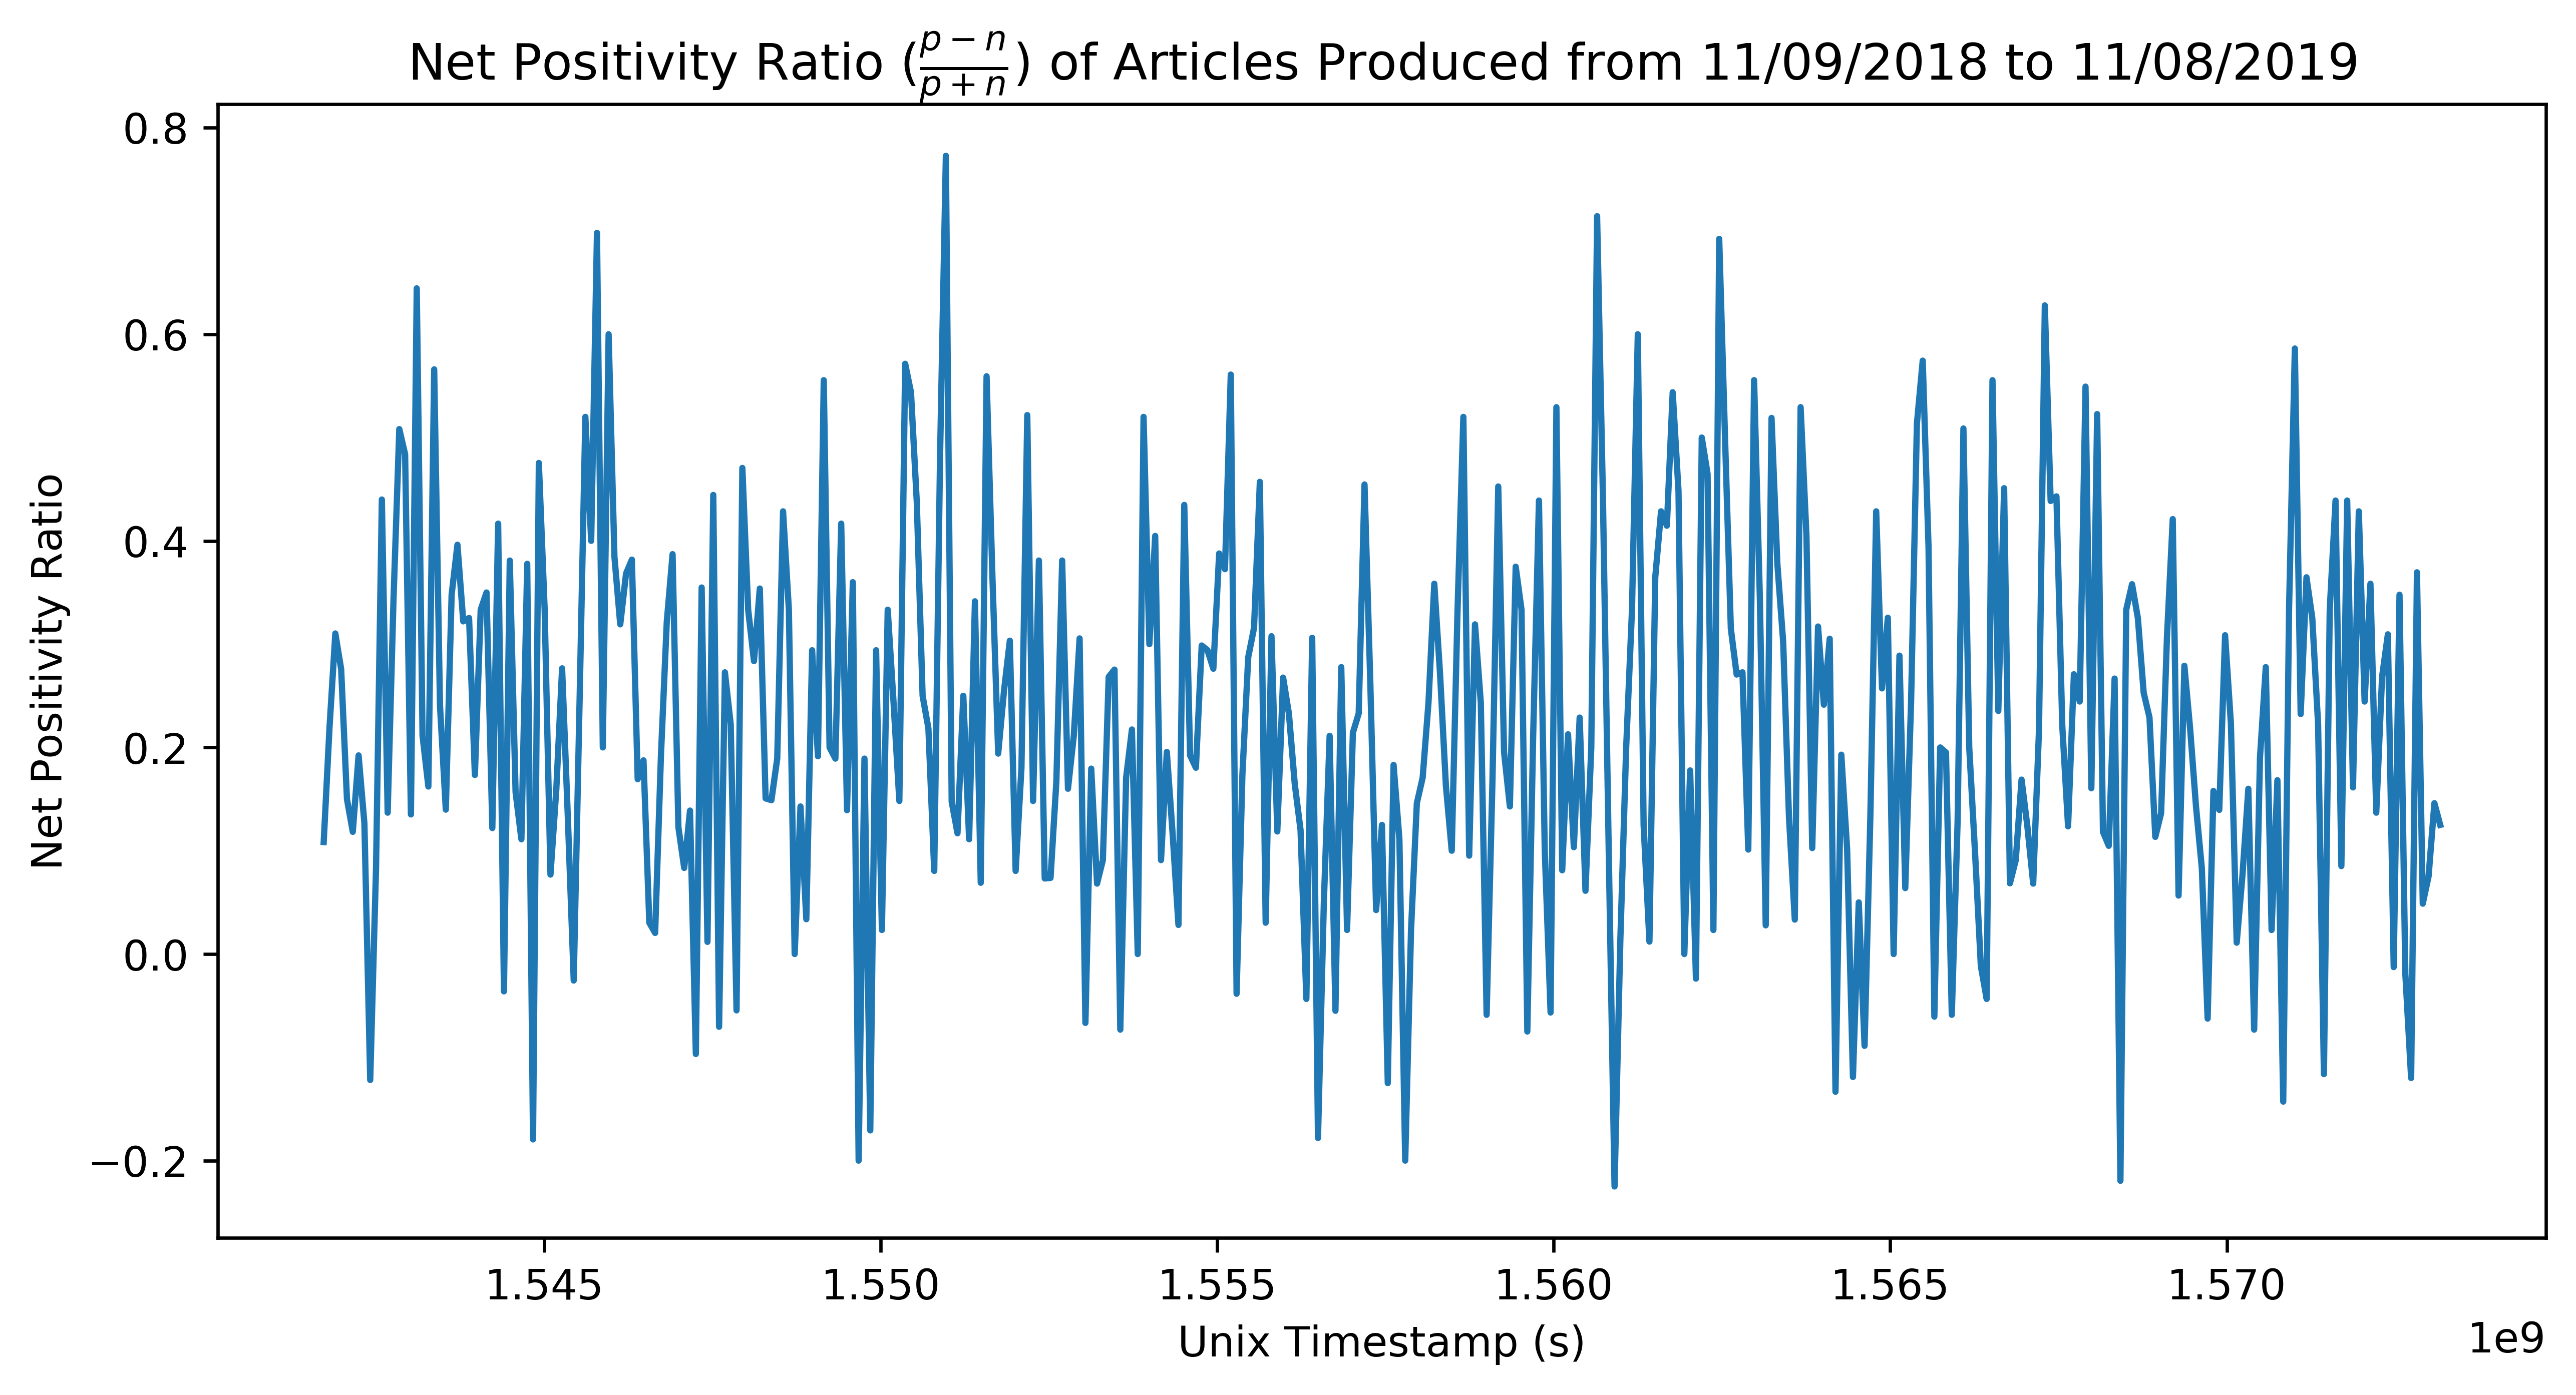

In [72]:
plt.plot(x, [(y[0] - y[1])/(y[0] + y[1]) for y in zip(date_pos.values(), date_neg.values())], label="Net Positivity Over Total")
plt.xlabel("Unix Timestamp (s)")
plt.ylabel("Net Positivity Ratio")
plt.title("Net Positivity Ratio ($\\frac{p - n}{p + n}$) of Articles Produced from 11/09/2018 to 11/08/2019")

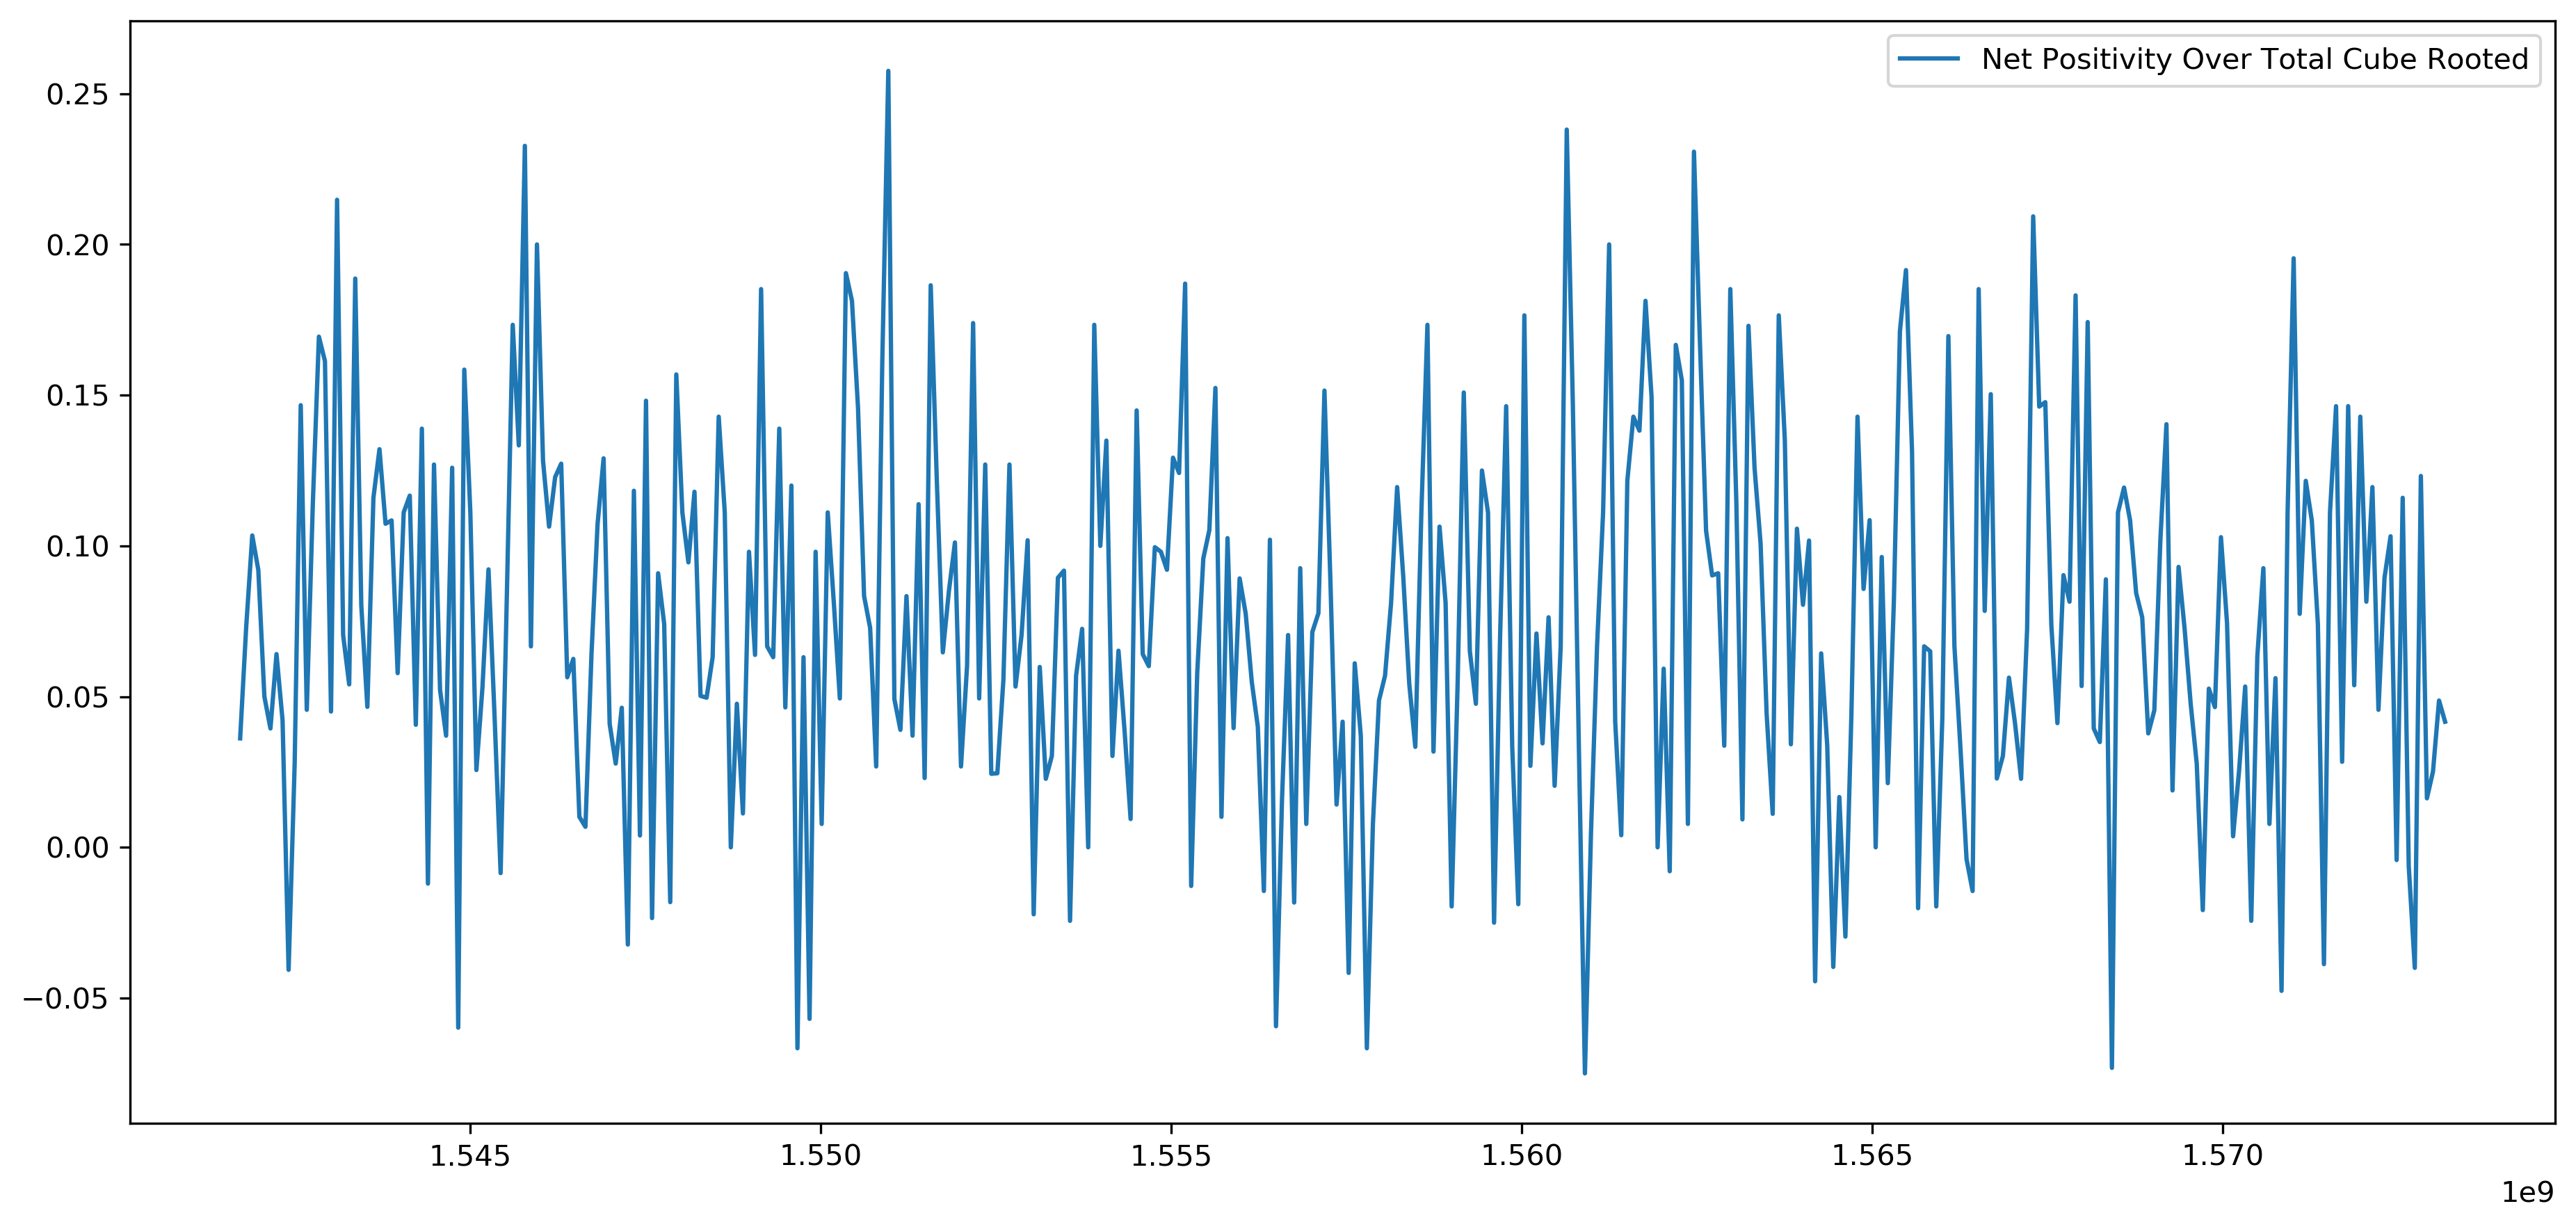

In [65]:
import math
plt.plot(x, [((y[0] - y[1])/(y[0] + y[1])) ** 1/3 for y in zip(date_pos.values(), date_neg.values())], label="Net Positivity Over Total Cube Rooted")
plt.legend()

In [55]:
fout = open("DJIAHeadlines.csv", "w")
for x in date_tot.keys():
    fout.write(", ".join([str(y) for y in [x, date_tot[x], date_pos[x], date_neg[x]]]) + "\n")
fout.close()